# Bagging and Random Forest (Week 4. Home task 1)


##**Оглавление**

-------------

### [0. Импорт библиотек](#step0)

###[1. Загрузка датасета digits из sklearn.datasets](#step1)

###[2. Подготовка матрицы признаков X и ответов на обучающей выборке у](#step2)

###[3. Создание DecisionTreeClassifier с настройками по умолчанию](#step3)
*   Измерение качества его работы с помощью cross_val_score.
*   Ответ на первое задание

###[4. Обучение бэггинга над DecisionTreeClassifier.](#step4) 
*  Измерение качества квалификации новой модели
*  Ответ на второе задание

###[5. Подбор параметров BaggingClassifier такими, чтобы каждый базовый алгоритм обучался не на всех признаках $d$, а на $\sqrt{d}$ признаков](#step5)
*  Измерение качества квалификации новой модели
*  Ответ на третье задание

###[6. Выбор случайных признаков при построении каждой вершины](#step6)
*  Измерение качества квалификации новой модели
*  Ответ на четвертое задание

###[7. Полученный в пункте 6 классификатор - Random Forest. Сравнить с RandomForestClassifier из sklearn.ensemble.](#step7)

###[8. Ответ на задание 5.](#step8)

---------------

<a name = "step0"></a>

#Импорт библиотек

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

<a name = "step1"></a>
# Загрузка датасета digits 
с помощью функции load_digits из sklearn.datasets.

In [36]:
data = datasets.load_digits()
data.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

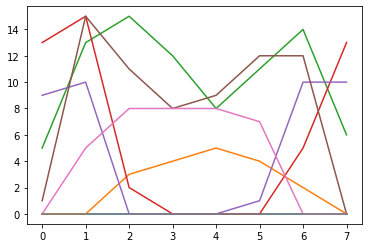

In [37]:
plt.plot(data.images[0])

<a name = "step2"></a>
#Подготовка матрицы признаков X и ответов на обучающей выборке у (поля data и target)

In [39]:
X = data.data
y = data.target

Для оценки качества далее нужно использовать cross_val_score из sklearn.model_selection с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. На практике часто хватает k=5, но в данной работе использовано k = 10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. Функция cross_val_score возвращает numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызывается метод .mean() у массива, который возвращает cross_val_score.

Для ускорения вычисления cross_val_score следует использовать параметр n_jobs, но нужно быть осторожным: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

<a name = "step3"></a>
# Создание DesicionTreeClassifier с настройками по умолчанию

In [40]:
dt_classifier = DecisionTreeClassifier()
#измерение качества модели
cvs = cross_val_score(dt_classifier, X, y, cv = 10)
cvs

array([0.78888889, 0.82777778, 0.83333333, 0.8       , 0.77777778,
       0.88888889, 0.87222222, 0.82122905, 0.82681564, 0.81564246])

In [41]:
cvs.mean()

0.8252576039726878

In [42]:
with open("answer1.txt", "w") as fout:
  fout.write(str(cvs.mean()))

<a name = "step4"></a>
# Воспользуемся BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DesicionTreeClassifier.
 Используем в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

In [43]:
bagging = BaggingClassifier(dt_classifier, n_estimators=100)
#измерение качества модели
cvs_bagging = cross_val_score(bagging, X, y, cv = 10)
cvs_bagging

array([0.87222222, 0.95      , 0.91111111, 0.92222222, 0.92222222,
       0.98333333, 0.95555556, 0.89944134, 0.89385475, 0.91061453])

In [44]:
cvs_bagging.mean()

0.9220577281191804

In [45]:
with open("answer2.txt", "w") as fout:
  fout.write(str(cvs.mean()))

<a name = "step5"></a>
# Изменим параметры BaggingClassifier
таким образом, чтобы каждый базовый алгоритм обучался не на $d$ признаках, а на $\sqrt d$ случайных признаков.


In [46]:
n = data.data.shape[1]
new_bagging = BaggingClassifier(dt_classifier, n_estimators=100, \
                                max_features=int(np.sqrt(data.data.shape[1])))

Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.


In [47]:
cvs_new_bagging = cross_val_score(new_bagging, X, y, cv = 10)
cvs_new_bagging

array([0.91666667, 0.96111111, 0.93888889, 0.87777778, 0.96111111,
       0.96111111, 0.96111111, 0.98882682, 0.92178771, 0.89385475])

In [48]:
cvs_new_bagging.mean()

0.9382247051520796

In [49]:
with open("answer3.txt", "w") as fout:
  fout.write(str(cvs.mean()))

<a name = "step6"></a>
#Попробуем выбор случайных признаков при построении каждой вершины дерева.
Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DesicionTreeClassifier.

In [50]:
mult_dt_classifier = DecisionTreeClassifier(max_features=int(np.sqrt(data.data.shape[1])))
mult_bagging = BaggingClassifier(mult_dt_classifier, n_estimators=100)
#измерение качества
cvs_mult_bagging = cross_val_score(mult_bagging, X, y, cv = 10)
cvs_mult_bagging

array([0.91666667, 0.97222222, 0.93333333, 0.92777778, 0.96111111,
       0.97222222, 0.97222222, 0.97206704, 0.93296089, 0.9273743 ])

In [51]:
cvs_mult_bagging.mean()

0.9487957790192427

In [52]:
with open("answer4.txt", "w") as fout:
  fout.write(str(cvs_mult_bagging.mean()))

<a name = "step7"></a>
# Сравним полученный результат с RandomForestClassifier из sklearn.ensemble

In [53]:
rf_classifier = RandomForestClassifier()
rf_bagging = BaggingClassifier(rf_classifier, n_estimators=100)
#измерим качество
cvs_rf = cross_val_score(rf_bagging, X, y, cv = 10)
print(cvs_rf, '\n') 
print(cvs_rf.mean())

[0.9        0.97222222 0.95       0.93333333 0.96111111 0.97222222
 0.96666667 0.96089385 0.92178771 0.93854749] 

0.9476784605834885


<a name = "step8"></a>

#Ответ на задание 5.
Нужно выбрать правильные утверждения из приведенных ниже


1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [61]:
rf_classifier_1 = RandomForestClassifier(n_estimators=200)
cross_val_score(rf_classifier_1, X, y, cv = 10).mean()

0.9543575418994413

~~1) Случайный лес сильно переобучается с ростом количества деревьев~~

In [60]:
rf_classifier_2 = RandomForestClassifier(n_estimators=10)
cross_val_score(rf_classifier_2, X, y, cv = 10).mean()

0.9137274984481689

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

In [65]:
rf_classifier_3_1 = RandomForestClassifier(n_estimators = 10)
check_prev = cross_val_score(rf_classifier_3_1, X, y, cv = 10).mean()
rf_classifier_3_1 = RandomForestClassifier(n_estimators = 20)
check = cross_val_score(rf_classifier_3_1, X, y, cv = 10).mean()
vareps = 0.01
i = 30
while (abs(check - check_prev) >= 0.0001):
  rf_classifier_3_1 = RandomForestClassifier(n_estimators=i)
  check_prev = check
  check = cross_val_score(rf_classifier_3_1, X, y, cv = 10).mean()
  i = i + 10
print(i) 

130


3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

In [66]:
rf_classifier_4_1 = RandomForestClassifier(max_features=50)
cross_val_score(rf_classifier_4_1, X, y, cv = 10).mean()

0.9298541278708876

In [67]:
rf_classifier_4_2 = RandomForestClassifier(max_features=5)
cross_val_score(rf_classifier_4_2, X, y, cv = 10).mean()

0.9454748603351953

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

~~5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.~~

In [68]:
rf_classifier_6 = RandomForestClassifier(max_depth=5)
cross_val_score(rf_classifier_6, X, y, cv = 10).mean()

0.9070453134698944

~~6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.~~

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [69]:
with open("answer5.txt", "w") as fout:
  fout.write(str(2) + str(3) + str(4) + str(7))